In [482]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 12, 6

In [483]:
# численность
x_init = 0.1
y_init = 0.1

# коэф. собственной скорости роста вида
a1 = 1
a2 = 1.5

# взаимодействие видов
b1 = 0.2
b2 = 0.1

# самоограничение численности
c1 = 0.2
c2 = 0.4

# время
dt = 0.1
t_limit = 20

In [484]:
def x_der(x, y):
    return (a1 - b1 * y - c1 * x) * x


def y_der(x, y):
    return (a2 - b2 * x - c2 * y) * y

In [485]:
def runge_kutta4(x, y, t):
    k1x = x_der(x, y) * t
    k1y = y_der(x, y) * t
    k2x = x_der(x + k1x/2, y + k1y/2) * t
    k2y = y_der(x + k1x/2, y + k1y/2) * t
    k3x = x_der(x + k2x/2, y + k2y/2) * t
    k3y = y_der(x + k2x/2, y + k2y/2) * t
    k4x = x_der(x + k3x, y + k3y) * t
    k4y = y_der(x + k3x, y + k3y) * t
    return x + (k1x + 2*k2x + 2*k3x + k4x) / 6, y + (k1y + 2*k2y + 2*k3y + k4y) / 6

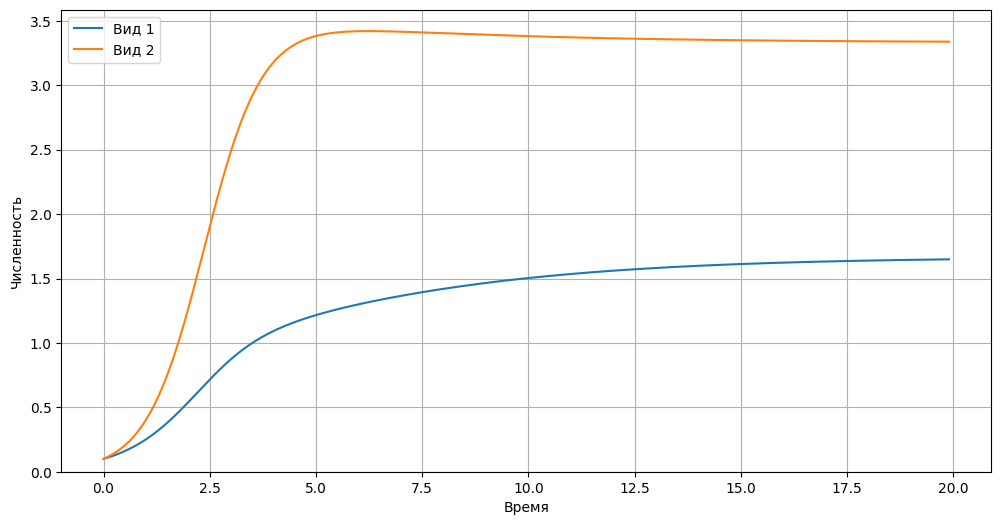

In [486]:
def solver(x_init, y_init):
    x_list = [x_init]
    y_list = [y_init]

    for i in range(num_of_iter - 1):
        temp = runge_kutta4(x_list[i], y_list[i], dt)
        x_list.append(temp[0])
        y_list.append(temp[1])
    return x_list, y_list

num_of_iter = int(t_limit / dt)
t_list = [i * dt for i in range(num_of_iter)]
result = solver(x_init, y_init)

plt.plot(t_list, result[0], label='Вид 1')
plt.plot(t_list, result[1], label='Вид 2')
plt.xlabel('Время')
plt.ylabel('Численность')
plt.grid()
plt.legend()
plt.gca().set_ylim(bottom=0)
plt.show()

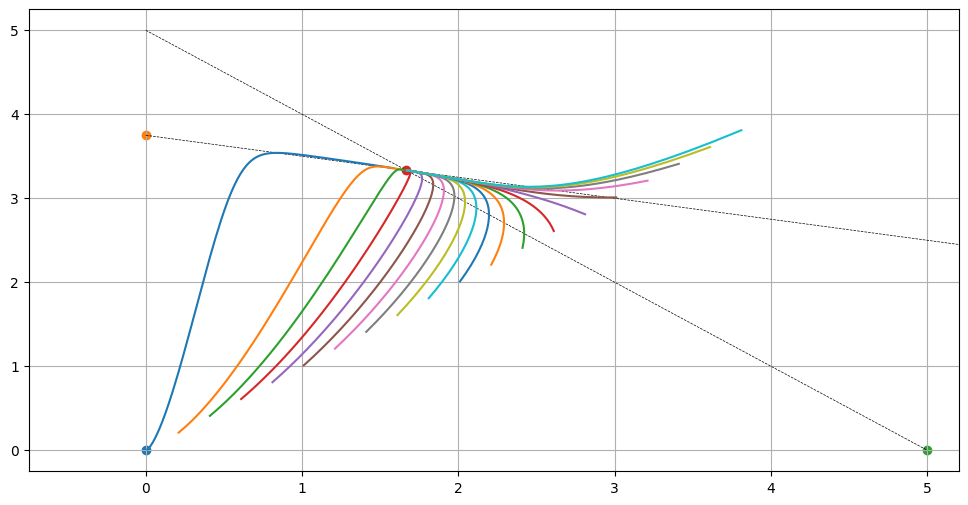

In [487]:
init_val = 0.01
step = 0.2
num = 20

x_init_list = [init_val + i * step for i in range(num)]
y_init_list = [init_val + i * step for i in range(num)]

# начало координат, при любых параметрах системы представляет собой неустойчивый узел
plt.scatter([0], [0])
# стационарное состояние представляет собой седло при a1 > b1/с2 и устойчивый узел при a1 < b1/с2
plt.scatter([0], [a2 / c2])
# стационарное решение седло при a2 > b2/c1 и устойчивый узел при a2 < b2/c1
plt.scatter([a1 / c1], [0])
# Стационарное состояние характеризует сосуществование двух конкурирующих видов и представляет собой устойчивый узел
# в случае выполнения соотношения a1b1/c2 < a1 < a2c1/b2
plt.scatter([(a1*c2 - a2*b1) / (c1*c2 - b1*b2)], [(a2*c1 - a1*b2) / (c1*c2 - b1*b2)])

plt.plot([0, a1/c1], [a1/b1, 0], lw=0.5, color='black', linestyle='--')
plt.plot([0, a2/b2], [a2/c2, 0], lw=0.5, color='black', linestyle='--')

for i in range(len(x_init_list)):
    temp = solver(x_init_list[i], y_init_list[i])
    plt.plot(temp[0], temp[1])

plt.xlim(right=a1/c1 + 0.2)
plt.grid()
plt.show()